## Parcial Final

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import pandas as pd
import scipy.optimize as spo

## Teórico:

Partiendo de las siguientes premisas:
    
$$
\sum \vec F =m(\vec a +2 \vec w \times \vec v)\\
\vec w=[-wcos\lambda,0,wsin\lambda]\\
\vec r= [rcos\theta,rsin\theta,r]
$$

Y de que $wr=v$. Podemos obtener el vector de velocidad a partir de:


$$
\begin{equation}
\begin{split}
\vec v&=\vec w\times \vec r \\
&=\begin{pmatrix}
-wrsin\theta sin\lambda\\
wrcos\lambda\\
-wrcos\lambda sin\theta
\end{pmatrix}
\end{split}
\end{equation}
$$


De modo que se puede plantear la siguiente ecuación:

$$\begin{equation}
\begin{split}
-m\begin{pmatrix}
0\\
0\\
g
\end{pmatrix}
&= 
m\Big(\begin{pmatrix}
\ddot{x}\\
\ddot{y}\\
\ddot{z}
\end{pmatrix} + 2\begin{pmatrix}
-wcos\lambda\\
0\\
wsin\lambda
\end{pmatrix}\times \begin{pmatrix}
-wrsin\theta sin\lambda\\
wrcos\lambda\\
-wrcos\lambda sin\theta
\end{pmatrix}
\Big)\\
-\begin{pmatrix}
0\\
0\\
g
\end{pmatrix}&=\begin{pmatrix}
\ddot{x}\\
\ddot{y}\\
\ddot{z}
\end{pmatrix} +2\begin{pmatrix}
-w^2 r sin\lambda cos\lambda\\
w^2rsin^2\theta sen\theta + w^2rcos^2\lambda cos\theta\\
-w^2 r cos^2\lambda
\end{pmatrix}
\end{split}
\end{equation}
$$

De esta manera obtenemos el siguiente sistema de ecuaciones:

$$
\begin{equation}
\begin{split}
\ddot{x}&=2w^2rsin^2 \lambda cos \lambda \\
\ddot{y}&=-2w^2rcos^2\lambda sin\theta - 2w^2rsin\lambda sin\theta\\
\ddot{z}&=-g+2w^2rcos^2\lambda
\end{split}
\end{equation}
$$

Y teniendo en cuenta el vector de velocidad hallado previamente tenemos que:

$$
\begin{equation}
\begin{split}
\dot{x}&=wrsin\lambda sin\theta\\
\dot{y}&=wrcos\lambda\\
\dot{z}&=wrcos\lambda sin\theta
\end{split}
\end{equation}
$$

Por lo tanto, llegamos a:

$$
\begin{equation}
\begin{split}
\ddot{x}&=2wsin\lambda \dot{y}\\
\ddot{y}&=-2wcos\lambda \dot{z}-2wsin\lambda \dot{x}\\
\ddot{z}&=-g + 2wcos\lambda \dot{y}
\end{split}
\end{equation}
$$

## Parte 1

a, b)

In [2]:
datos=pd.read_csv('Datos.txt')
lam_30= datos[datos.angle==30]
lam_30

,h,angle,y,sigmay
20,10.0,30.0,0.0013,0.0015
21,20.0,30.0,0.0017,0.0015
22,30.0,30.0,0.0038,0.0015
23,40.0,30.0,0.0059,0.0015
24,50.0,30.0,0.0067,0.0015
25,60.0,30.0,0.0094,0.0015
26,70.0,30.0,0.0122,0.0015
27,80.0,30.0,0.0132,0.0015
28,90.0,30.0,0.0151,0.0015
29,100.0,30.0,0.0186,0.0015


c)

In [3]:
h_=sym.Symbol('h',real=True)
w_=sym.Symbol('w',real=True)
lamd=sym.Symbol('lambda',real=True)
g_=sym.Symbol('g',real=True)

def Coriolis_sym(h,w,lam,g):
    res=(2*(2**(1/2))/3) *w*sym.cos(lam)*((h**3)/g)**(1/2)
    return res

Coriolis_sym(h_,w_,lamd,g_)

0.942809041582063*w*(h**3/g)**0.5*cos(lambda)

In [4]:
def Coriolis_np(h,w,lam,g):
    ang=lam*2*np.pi/360
    res=(2*(2**(1/2))/3) *w*np.cos(ang)*((h**3)/g)**(1/2)
    return res

d)

In [5]:
def chi2(w,h,y,sigmay,angle,g):
    resp=np.sum((y-Coriolis_np(h,w,angle,g))**2 /(2*sigmay**2))
    return resp

e)

In [6]:
h=lam_30.h
y=lam_30.y
sigmay=lam_30.sigmay
angle=lam_30.angle
g=9.81

nll=lambda *w:chi2(*w)
p0=np.ones(1)


In [7]:
minimizar = spo.minimize( nll, p0, args=(h,y,sigmay,angle,g),options={'disp':True} )

bestparam=minimizar.x
bestparam


Optimization terminated successfully.
         Current function value: 1.145718
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4


array([7.24399804e-05])

f)

Text(0, 0.5, 'y[m]')

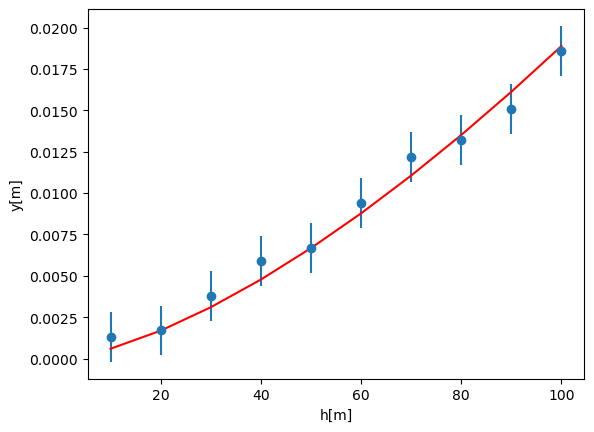

In [8]:
_x = np.linspace(np.min(h),np.max(h),10)
_y = Coriolis_np(_x,bestparam,angle,g)

plt.errorbar(h,y,yerr=sigmay,fmt='o')
plt.plot(_x,_y,color='r')
plt.xlabel('h[m]')
plt.ylabel('y[m]')

## Parte 2:
## Propagarción de la incertidumbre de la aceleración de la gravedad:

a, b, c, d, e)

In [9]:
y_arr=np.array(y)
h=np.array(h)
sigmay_arr=np.array(sigmay)
N=300

In [10]:
def Optimizar(lamb,y,h,sigmay):
    Gravedad=np.zeros(300)
    Omega=np.zeros(300)

    for i in range(N):
        g_i= 9.81+np.random.normal(loc=0,scale=1)
        y_n=y+np.random.normal(loc=0,scale=sigmay[0],size=len(y))
        Gravedad[i]=g_i
        optim = spo.minimize( nll, p0, args=(h,y_n,sigmay,lamb,g_i),options={'disp':True} )
        Omega[i]=optim.x
        
    return Omega,Gravedad


f)

In [11]:
def DistConjunta(Omega,Gravedad):
    binsx=np.linspace(min(Omega),max(Omega),33)
    binsy=np.linspace(min(Gravedad),max(Gravedad),33)
    H2,binsx,binsy = np.histogram2d(Omega,Gravedad,bins=(binsx,binsy))
    
    return H2,binsx,binsy

In [12]:
Omega_30,Gravedad_30=Optimizar(30,y_arr,h,sigmay_arr)
H230,binsx30,binsy30=DistConjunta(Omega_30,Gravedad_30)
H230

         Current function value: 9.198628
         Iterations: 2
         Function evaluations: 86
         Gradient evaluations: 37
         Current function value: 7.929256
         Iterations: 2
         Function evaluations: 64
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 9.902567
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 9.941158
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 3.003192
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 2.809808
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 0.583770
         Itera

         Current function value: 12.812203
         Iterations: 2
         Function evaluations: 74
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 2.225530
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 3.745726
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 9.119744
         Iterations: 2
         Function evaluations: 84
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 4.492747
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 12.392008
         Iterations: 2
         Function evaluations: 62
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 9.322756
         Ite

         Current function value: 3.990912
         Iterations: 2
         Function evaluations: 68
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 5.718834
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 5.355323
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 6.322131
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 4.276818
         Iterations: 2
         Function evaluations: 104
         Gradient evaluations: 46
Optimization terminated successfully.
         Current function value: 4.218652
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current fu

         Current function value: 4.665613
         Iterations: 2
         Function evaluations: 90
         Gradient evaluations: 39
Optimization terminated successfully.
         Current function value: 10.611910
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 7.977308
         Iterations: 2
         Function evaluations: 62
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 3.539296
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 3.333748
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 2.214640
         Iterations: 2
         Function evaluations: 84
         Gradient evaluations: 36
         Current function value: 4.944632
         Iterations: 2
         Function evaluation

         Current function value: 5.743255
         Iterations: 2
         Function evaluations: 74
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 8.324543
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 4.383743
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 4.855497
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

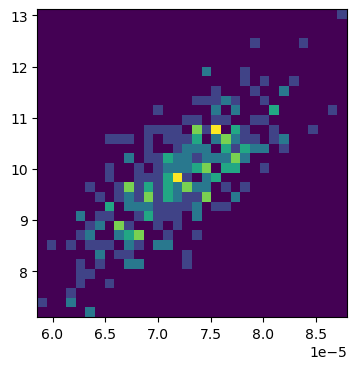

In [13]:
fig= plt.figure(figsize=(4,4))
plt.imshow(H230.T, origin='lower', extent=[binsx30[0], binsx30[-1], binsy30[0], binsy30[-1]], aspect='auto')


g)

Las variables sí están correlacionadas ya que en la gráfica se percibe una pendiente positiva. De modo que esto implica la correlación entre las variables implicadas.

h,i)

In [14]:
def Int_conf(H2,binsx):
    H1=np.sum(H2,axis=1)
    cs = np.cumsum(H1)
    ij = np.searchsorted( cs, np.percentile(cs,16) )
    ii = np.searchsorted( cs, np.percentile(cs,50) )
    ji = np.searchsorted( cs, np.percentile(cs,84) )  
    
    int_lower=binsx[ij]
    best_w=binsx[ii]
    int_upper=binsx[ji]
    
    return int_lower,int_upper,best_w


In [15]:
int_lower_30,int_upper_30,best_w= Int_conf(H230,binsx30)

int_lower_30,int_upper_30,best_w

(6.316915729962668e-05, 8.340040954068502e-05, 7.328478342015585e-05)

j)

In [16]:
omegas=[]
errores=[]

In [17]:
latis=[10,20,30,40,50,60]

for j in range(1,7):
    lam_j=datos[datos.angle==latis[j-1]]
    h=np.array(lam_j.h)
    angle=np.array(lam_j.angle)
    sigmay=np.array(lam_j.sigmay)
    y=np.array(lam_j.y)
    
    Omega_j,Gravedad_j=Optimizar(j*10,y,h,sigmay)
    H2_j,binsx_j,binsy_j=DistConjunta(Omega_j,Gravedad_j)
    
    int_lower_j,int_upper_j,best_w_j= Int_conf(H2_j,binsx_j)
    
    omegas.append(best_w_j)
    errores.append([int_lower_j,int_upper_j])

         Current function value: 9.809507
         Iterations: 2
         Function evaluations: 66
         Gradient evaluations: 27
         Current function value: 7.847538
         Iterations: 2
         Function evaluations: 66
         Gradient evaluations: 27
         Current function value: 5.727120
         Iterations: 2
         Function evaluations: 96
         Gradient evaluations: 42
         Current function value: 10.110082
         Iterations: 2
         Function evaluations: 66
         Gradient evaluations: 27
         Current function value: 8.429176
         Iterations: 2
         Function evaluations: 86
         Gradient evaluations: 37
         Current function value: 6.208177
         Iterations: 2
         Function evaluations: 88
         Gradient evaluations: 38
         Current function value: 14.400794
         Iterations: 2
         Function evaluations: 60
         Gradient evaluations: 24
         Current function value: 6.426226
         Iterations: 2
  

         Current function value: 10.087374
         Iterations: 2
         Function evaluations: 88
         Gradient evaluations: 38
         Current function value: 5.907892
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
         Current function value: 8.599067
         Iterations: 2
         Function evaluations: 94
         Gradient evaluations: 41
         Current function value: 2.497071
         Iterations: 2
         Function evaluations: 56
         Gradient evaluations: 22
         Current function value: 4.300327
         Iterations: 2
         Function evaluations: 88
         Gradient evaluations: 38
         Current function value: 11.570795
         Iterations: 2
         Function evaluations: 64
         Gradient evaluations: 26
         Current function value: 10.661717
         Iterations: 2
         Function evaluations: 80
         Gradient evaluations: 34
         Current function value: 4.062562
         Iterations: 2
 

         Current function value: 12.780840
         Iterations: 2
         Function evaluations: 84
         Gradient evaluations: 36
         Current function value: 14.551278
         Iterations: 2
         Function evaluations: 66
         Gradient evaluations: 27
         Current function value: 5.928806
         Iterations: 2
         Function evaluations: 90
         Gradient evaluations: 39
         Current function value: 4.725222
         Iterations: 2
         Function evaluations: 90
         Gradient evaluations: 39
         Current function value: 9.579722
         Iterations: 2
         Function evaluations: 78
         Gradient evaluations: 33
         Current function value: 11.756258
         Iterations: 2
         Function evaluations: 58
         Gradient evaluations: 23
         Current function value: 9.961147
         Iterations: 2
         Function evaluations: 92
         Gradient evaluations: 40
         Current function value: 5.760188
         Iterations: 2
 

         Current function value: 15.123115
         Iterations: 2
         Function evaluations: 86
         Gradient evaluations: 37
         Current function value: 13.209012
         Iterations: 2
         Function evaluations: 92
         Gradient evaluations: 40
         Current function value: 3.248434
         Iterations: 2
         Function evaluations: 84
         Gradient evaluations: 36
         Current function value: 6.666972
         Iterations: 2
         Function evaluations: 88
         Gradient evaluations: 38
         Current function value: 6.441933
         Iterations: 2
         Function evaluations: 64
         Gradient evaluations: 26
         Current function value: 5.056405
         Iterations: 2
         Function evaluations: 72
         Gradient evaluations: 30
         Current function value: 4.578866
         Iterations: 2
         Function evaluations: 112
         Gradient evaluations: 50
         Current function value: 8.964641
         Iterations: 2
 

         Current function value: 3.913025
         Iterations: 2
         Function evaluations: 74
         Gradient evaluations: 31
         Current function value: 18.780989
         Iterations: 2
         Function evaluations: 84
         Gradient evaluations: 36
         Current function value: 3.741246
         Iterations: 2
         Function evaluations: 70
         Gradient evaluations: 29
         Current function value: 5.409499
         Iterations: 2
         Function evaluations: 66
         Gradient evaluations: 27
         Current function value: 5.415673
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
         Current function value: 4.623858
         Iterations: 2
         Function evaluations: 86
         Gradient evaluations: 37
         Current function value: 6.156987
         Iterations: 2
         Function evaluations: 92
         Gradient evaluations: 40
         Current function value: 11.615116
         Iterations: 2
  

         Current function value: 9.734173
         Iterations: 2
         Function evaluations: 70
         Gradient evaluations: 29
         Current function value: 4.636182
         Iterations: 2
         Function evaluations: 96
         Gradient evaluations: 42
         Current function value: 3.635201
         Iterations: 2
         Function evaluations: 82
         Gradient evaluations: 35
         Current function value: 6.532733
         Iterations: 2
         Function evaluations: 90
         Gradient evaluations: 39
         Current function value: 6.422050
         Iterations: 2
         Function evaluations: 94
         Gradient evaluations: 41
         Current function value: 5.737260
         Iterations: 2
         Function evaluations: 60
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 16.848957
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value:

         Current function value: 4.062919
         Iterations: 2
         Function evaluations: 58
         Gradient evaluations: 23
         Current function value: 6.589534
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
         Current function value: 4.721521
         Iterations: 2
         Function evaluations: 88
         Gradient evaluations: 38
         Current function value: 2.792421
         Iterations: 2
         Function evaluations: 64
         Gradient evaluations: 26
         Current function value: 4.174394
         Iterations: 2
         Function evaluations: 78
         Gradient evaluations: 33
         Current function value: 7.380628
         Iterations: 2
         Function evaluations: 88
         Gradient evaluations: 38
         Current function value: 4.243297
         Iterations: 2
         Function evaluations: 74
         Gradient evaluations: 31
         Current function value: 5.501421
         Iterations: 2
    

         Current function value: 2.794437
         Iterations: 2
         Function evaluations: 60
         Gradient evaluations: 24
         Current function value: 2.056768
         Iterations: 2
         Function evaluations: 72
         Gradient evaluations: 30
         Current function value: 9.343218
         Iterations: 2
         Function evaluations: 98
         Gradient evaluations: 43
         Current function value: 1.327117
         Iterations: 2
         Function evaluations: 62
         Gradient evaluations: 25
         Current function value: 2.100962
         Iterations: 2
         Function evaluations: 78
         Gradient evaluations: 33
         Current function value: 8.644015
         Iterations: 2
         Function evaluations: 80
         Gradient evaluations: 34
         Current function value: 6.518159
         Iterations: 2
         Function evaluations: 72
         Gradient evaluations: 30
         Current function value: 4.240908
         Iterations: 2
    

         Current function value: 3.030243
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
         Current function value: 2.093717
         Iterations: 2
         Function evaluations: 116
         Gradient evaluations: 52
         Current function value: 5.510544
         Iterations: 2
         Function evaluations: 56
         Gradient evaluations: 22
         Current function value: 7.140648
         Iterations: 2
         Function evaluations: 74
         Gradient evaluations: 31
         Current function value: 3.925146
         Iterations: 2
         Function evaluations: 78
         Gradient evaluations: 33
         Current function value: 3.684547
         Iterations: 2
         Function evaluations: 88
         Gradient evaluations: 38
         Current function value: 8.128816
         Iterations: 2
         Function evaluations: 100
         Gradient evaluations: 44
         Current function value: 9.482841
         Iterations: 2
  

         Current function value: 10.374693
         Iterations: 2
         Function evaluations: 80
         Gradient evaluations: 34
         Current function value: 8.113012
         Iterations: 2
         Function evaluations: 74
         Gradient evaluations: 31
         Current function value: 5.411225
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
         Current function value: 3.821069
         Iterations: 2
         Function evaluations: 88
         Gradient evaluations: 38
         Current function value: 2.322349
         Iterations: 2
         Function evaluations: 52
         Gradient evaluations: 20
         Current function value: 7.471193
         Iterations: 2
         Function evaluations: 74
         Gradient evaluations: 31
         Current function value: 8.620827
         Iterations: 2
         Function evaluations: 74
         Gradient evaluations: 31
         Current function value: 3.980791
         Iterations: 2
   

         Current function value: 7.586387
         Iterations: 2
         Function evaluations: 82
         Gradient evaluations: 35
         Current function value: 3.618908
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
         Current function value: 5.286972
         Iterations: 2
         Function evaluations: 90
         Gradient evaluations: 39
         Current function value: 5.884992
         Iterations: 2
         Function evaluations: 74
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 3.878657
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 6.678662
         Iterations: 2
         Function evaluations: 80
         Gradient evaluations: 34
         Current function value: 0.898191
         Iterations: 2
         Function evaluations: 100
         Gradient evaluations: 44
         Current function value:

         Current function value: 3.425204
         Iterations: 2
         Function evaluations: 80
         Gradient evaluations: 34
         Current function value: 4.836693
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
         Current function value: 3.846180
         Iterations: 2
         Function evaluations: 94
         Gradient evaluations: 41
         Current function value: 3.173800
         Iterations: 2
         Function evaluations: 80
         Gradient evaluations: 34
         Current function value: 4.425295
         Iterations: 2
         Function evaluations: 82
         Gradient evaluations: 35
         Current function value: 7.352967
         Iterations: 2
         Function evaluations: 74
         Gradient evaluations: 31
         Current function value: 4.710077
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
         Current function value: 9.644602
         Iterations: 2
    

         Current function value: 7.757539
         Iterations: 2
         Function evaluations: 82
         Gradient evaluations: 35
Optimization terminated successfully.
         Current function value: 3.335191
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 4.850311
         Iterations: 2
         Function evaluations: 74
         Gradient evaluations: 31
         Current function value: 2.901011
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 3.261132
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 6.661802
         Iterations: 2
         Function evaluations: 64
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 3.839271
         Iterations: 3
         Function evaluatio

         Current function value: 6.186974
         Iterations: 2
         Function evaluations: 86
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 4.161443
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 1.482319
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 6.235594
         Iterations: 2
         Function evaluations: 66
         Gradient evaluations: 27
         Current function value: 13.144986
         Iterations: 2
         Function evaluations: 92
         Gradient evaluations: 40
Optimization terminated successfully.
         Current function value: 5.582399
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 3.205679
         Iter

         Current function value: 10.606781
         Iterations: 2
         Function evaluations: 86
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 1.830716
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 2.586277
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 4.177774
         Iterations: 2
         Function evaluations: 58
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 4.896080
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 7.283819
         Iterations: 2
         Function evaluations: 82
         Gradient evaluations: 35
         Current function value: 8.920725
         Iterations: 2
         Function evaluation

         Current function value: 9.522158
         Iterations: 2
         Function evaluations: 54
         Gradient evaluations: 21
         Current function value: 4.143721
         Iterations: 2
         Function evaluations: 84
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 3.547974
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 4.642843
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 4.890449
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 6.630870
         Iterations: 2
         Function evaluations: 72
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 6.955271
         Itera

         Current function value: 6.654687
         Iterations: 2
         Function evaluations: 124
         Gradient evaluations: 56
         Current function value: 3.603848
         Iterations: 2
         Function evaluations: 78
         Gradient evaluations: 33
         Current function value: 6.404429
         Iterations: 2
         Function evaluations: 72
         Gradient evaluations: 30
         Current function value: 6.239838
         Iterations: 2
         Function evaluations: 94
         Gradient evaluations: 41
Optimization terminated successfully.
         Current function value: 6.002420
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 5.817808
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 14.850791
         Iterations: 2
         Function evaluations: 56
         Gradient evaluations

Optimization terminated successfully.
         Current function value: 4.693663
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 10.567287
         Iterations: 2
         Function evaluations: 70
         Gradient evaluations: 29
         Current function value: 6.317562
         Iterations: 2
         Function evaluations: 84
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 4.669535
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 2.193522
         Iterations: 2
         Function evaluations: 80
         Gradient evaluations: 34
         Current function value: 5.298881
         Iterations: 2
         Function evaluations: 86
         Gradient evaluations: 37
         Current function value: 2.395073
         Iterations: 2
         Function evaluations: 74
         Gradient evaluations:

         Current function value: 3.273755
         Iterations: 2
         Function evaluations: 74
         Gradient evaluations: 31
         Current function value: 9.788978
         Iterations: 2
         Function evaluations: 74
         Gradient evaluations: 31
         Current function value: 5.088948
         Iterations: 2
         Function evaluations: 98
         Gradient evaluations: 43
Optimization terminated successfully.
         Current function value: 7.164200
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 5.541610
         Iterations: 2
         Function evaluations: 82
         Gradient evaluations: 35
         Current function value: 7.133221
         Iterations: 2
         Function evaluations: 100
         Gradient evaluations: 44
         Current function value: 6.224990
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
         Current function value:

         Current function value: 5.597262
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
         Current function value: 4.313300
         Iterations: 2
         Function evaluations: 68
         Gradient evaluations: 28
         Current function value: 6.297865
         Iterations: 2
         Function evaluations: 70
         Gradient evaluations: 29
         Current function value: 4.930065
         Iterations: 2
         Function evaluations: 84
         Gradient evaluations: 36
         Current function value: 3.576056
         Iterations: 2
         Function evaluations: 78
         Gradient evaluations: 33
         Current function value: 5.513935
         Iterations: 2
         Function evaluations: 62
         Gradient evaluations: 25
         Current function value: 12.851235
         Iterations: 2
         Function evaluations: 92
         Gradient evaluations: 40
         Current function value: 6.733475
         Iterations: 2
   

         Current function value: 4.699711
         Iterations: 2
         Function evaluations: 84
         Gradient evaluations: 36
         Current function value: 6.152533
         Iterations: 2
         Function evaluations: 48
         Gradient evaluations: 18
         Current function value: 2.471836
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
         Current function value: 3.173484
         Iterations: 2
         Function evaluations: 60
         Gradient evaluations: 24
         Current function value: 7.909948
         Iterations: 2
         Function evaluations: 82
         Gradient evaluations: 35
         Current function value: 6.343236
         Iterations: 2
         Function evaluations: 96
         Gradient evaluations: 42
         Current function value: 11.710049
         Iterations: 2
         Function evaluations: 72
         Gradient evaluations: 30
         Current function value: 3.005288
         Iterations: 2
   

         Current function value: 11.189301
         Iterations: 2
         Function evaluations: 86
         Gradient evaluations: 37
         Current function value: 4.226145
         Iterations: 2
         Function evaluations: 70
         Gradient evaluations: 29
         Current function value: 2.170998
         Iterations: 2
         Function evaluations: 80
         Gradient evaluations: 34
         Current function value: 4.141605
         Iterations: 2
         Function evaluations: 90
         Gradient evaluations: 39
         Current function value: 4.890991
         Iterations: 2
         Function evaluations: 68
         Gradient evaluations: 28
         Current function value: 9.814538
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
         Current function value: 11.484142
         Iterations: 2
         Function evaluations: 68
         Gradient evaluations: 28
         Current function value: 9.792945
         Iterations: 2
  

         Current function value: 5.267011
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
         Current function value: 3.558862
         Iterations: 2
         Function evaluations: 70
         Gradient evaluations: 29
         Current function value: 8.046312
         Iterations: 2
         Function evaluations: 78
         Gradient evaluations: 33
         Current function value: 1.702410
         Iterations: 2
         Function evaluations: 82
         Gradient evaluations: 35
         Current function value: 4.127336
         Iterations: 2
         Function evaluations: 90
         Gradient evaluations: 39
         Current function value: 9.200694
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
         Current function value: 2.559073
         Iterations: 2
         Function evaluations: 86
         Gradient evaluations: 37
         Current function value: 1.865889
         Iterations: 2
    

         Current function value: 3.462449
         Iterations: 2
         Function evaluations: 72
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 4.539412
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 3.068398
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 5.322128
         Iterations: 2
         Function evaluations: 80
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 2.546110
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 9.247490
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 3.765393
         Iterati

         Current function value: 11.497332
         Iterations: 2
         Function evaluations: 64
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 5.846933
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 3.347778
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 9.139262
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 6.360735
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 3.848577
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current func

Optimization terminated successfully.
         Current function value: 8.973345
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 3.768036
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 8.958741
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 3.927152
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 3.941197
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 9.482519
         Iterations: 3
         Function evaluations: 8
         Gradient e

         Current function value: 3.088536
         Iterations: 2
         Function evaluations: 78
         Gradient evaluations: 33
Optimization terminated successfully.
         Current function value: 3.867706
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 6.179860
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 2.176226
         Iterations: 2
         Function evaluations: 84
         Gradient evaluations: 36
         Current function value: 4.426474
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 9.936868
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 6.712209
         Itera

         Current function value: 8.016645
         Iterations: 2
         Function evaluations: 74
         Gradient evaluations: 31
         Current function value: 5.344145
         Iterations: 2
         Function evaluations: 64
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 3.769044
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 3.127892
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 6.642387
         Iterations: 2
         Function evaluations: 70
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 3.451698
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 6.327421
         Iterations: 2
         Function evaluations

         Current function value: 6.657916
         Iterations: 2
         Function evaluations: 92
         Gradient evaluations: 40
         Current function value: 3.148188
         Iterations: 2
         Function evaluations: 68
         Gradient evaluations: 28
         Current function value: 2.589193
         Iterations: 2
         Function evaluations: 62
         Gradient evaluations: 25
         Current function value: 3.199698
         Iterations: 2
         Function evaluations: 82
         Gradient evaluations: 35
         Current function value: 1.453710
         Iterations: 2
         Function evaluations: 68
         Gradient evaluations: 28
         Current function value: 8.647390
         Iterations: 2
         Function evaluations: 80
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 4.037593
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfu

         Current function value: 11.448231
         Iterations: 2
         Function evaluations: 74
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 5.414151
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 2.624233
         Iterations: 2
         Function evaluations: 78
         Gradient evaluations: 33
Optimization terminated successfully.
         Current function value: 3.781394
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 5.159591
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 5.622620
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
         Current function value: 6.261623
         Iterations: 2
         Function evaluation

         Current function value: 2.623199
         Iterations: 2
         Function evaluations: 90
         Gradient evaluations: 39
Optimization terminated successfully.
         Current function value: 2.173254
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 4.423022
         Iterations: 2
         Function evaluations: 66
         Gradient evaluations: 27
         Current function value: 4.698618
         Iterations: 2
         Function evaluations: 78
         Gradient evaluations: 33
Optimization terminated successfully.
         Current function value: 3.121630
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 5.658266
         Iterations: 2
         Function evaluations: 92
         Gradient evaluations: 40
         Current function value: 6.883830
         Iterations: 2
         Function evaluations: 70
         Gradient evaluations: 

         Current function value: 6.233938
         Iterations: 2
         Function evaluations: 106
         Gradient evaluations: 47
Optimization terminated successfully.
         Current function value: 8.850181
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 7.170659
         Iterations: 2
         Function evaluations: 64
         Gradient evaluations: 26
         Current function value: 6.027804
         Iterations: 2
         Function evaluations: 88
         Gradient evaluations: 38
Optimization terminated successfully.
         Current function value: 1.723845
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 7.539104
         Iterations: 2
         Function evaluations: 84
         Gradient evaluations: 36
         Current function value: 5.232468
         Iterations: 2
         Function evaluations: 62
         Gradient evaluations:

In [18]:
omegas, errores

([7.027445549614465e-05,
  7.29165900165852e-05,
  7.322076034477643e-05,
  7.333958156427196e-05,
  6.907343320229354e-05,
  7.298694439034688e-05],
 [[6.153933764000829e-05, 7.900957335228102e-05],
  [6.276444814909518e-05, 8.306873188407521e-05],
  [6.355569207542607e-05, 8.288582861412679e-05],
  [6.379966107014726e-05, 8.287950205839665e-05],
  [5.708220644510501e-05, 8.106465995948208e-05],
  [5.820790689646283e-05, 8.642243302115057e-05]])

In [19]:
Combinado=np.mean(omegas)
Combinado

7.19686275024031e-05

In [20]:
errores_new=[]
for i in range(len(errores)):
    prom=np.abs(errores[i][0]-errores[i][1])/2
    errores_new.append(prom)

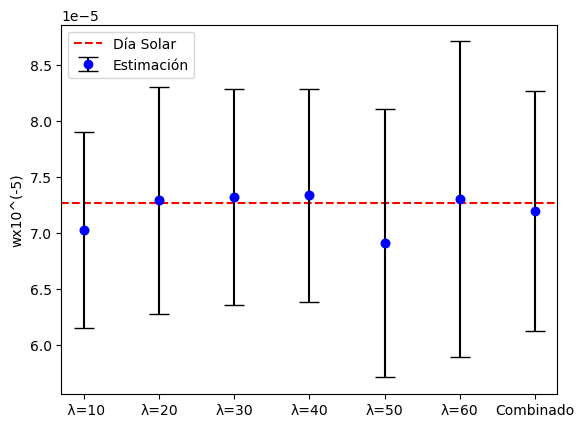

In [21]:
plt.scatter(latis,omegas)
plt.axhline(7.27e-5, linestyle = 'dashed', color = 'r', label="Día Solar")

for i in range(len(omegas)):
    ax = plt.errorbar(latis[i], omegas[i], yerr = errores_new[i], fmt="ob", capsize=7, ecolor="k")
    
plt.errorbar(70, Combinado, linestyle="None", yerr = np.sum(errores_new)/len(errores_new), fmt="ob", capsize=7, ecolor="k", label = "Estimación")
plt.xticks(latis + [70],[" λ=10", "λ=20", "λ=30", "λ=40", "λ=50", "λ=60", "Combinado"])
plt.ylabel('wx10^(-5)')
plt.legend()